# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Disabling warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
hotel_data = pd.read_csv('hotel_bookings.csv')

###### Show first 10 rows

In [3]:
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


Data summary

In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# EDA and Feature Engineering

Text(0, 0.5, 'Count')

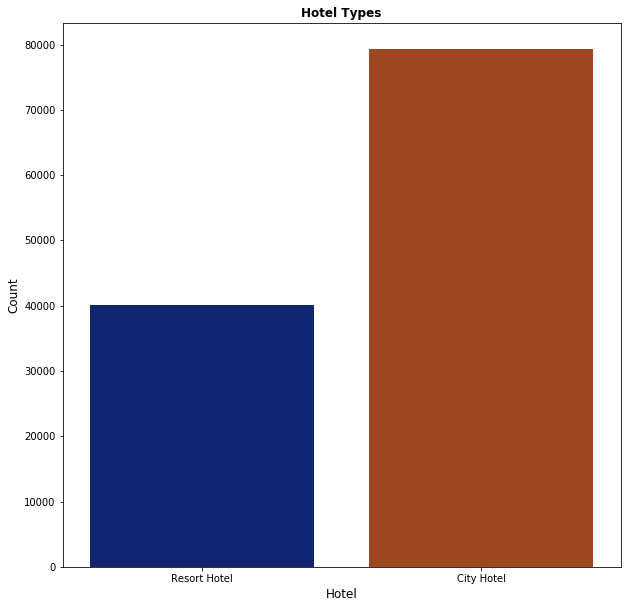

In [8]:
# Hotel types details

plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel_data, palette='dark')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Is Canceled? Graph

Text(0, 0.5, 'Canceled or Not Canceled')

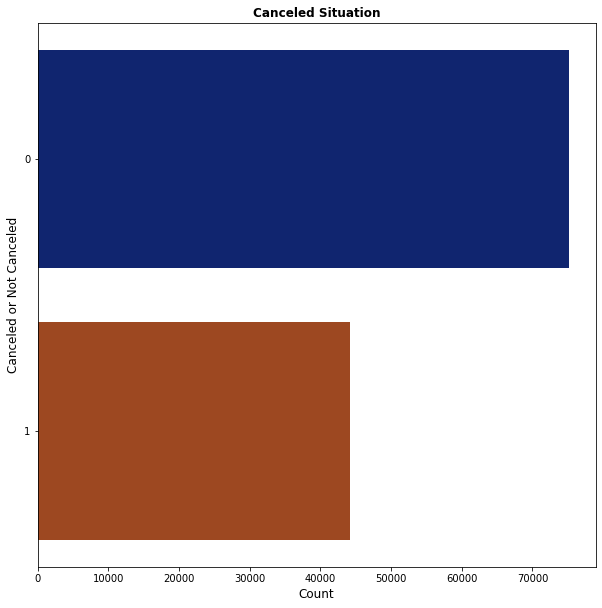

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= hotel_data, palette='dark')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

Arrival_date_year vs lead_time vs is_canceled exploration

In [5]:
pd.crosstab(index = hotel_data['arrival_date_year'],columns=hotel_data['is_canceled'], 
            margins=True, margins_name = 'Total').iloc[:10]

is_canceled,0,1,Total
arrival_date_year,,,
2015,13854,8142,21996
2016,36370,20337,56707
2017,24942,15745,40687
Total,75166,44224,119390


Text(0, 0.5, 'Lead Time')

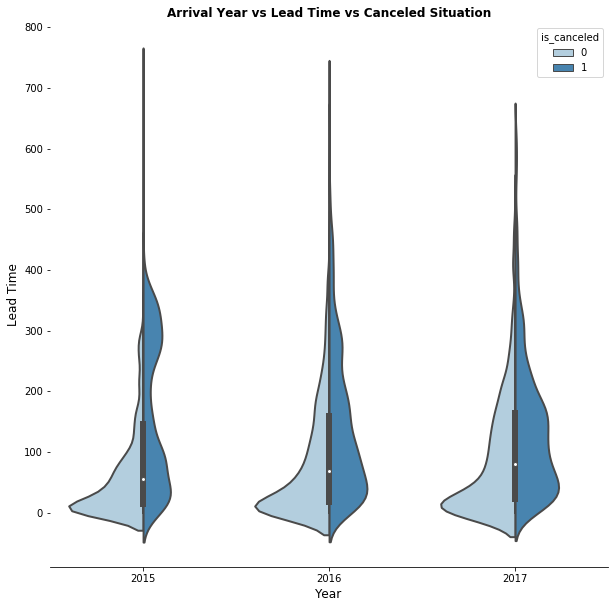

In [13]:
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_data, palette="Blues", bw=.2,
               cut=2, linewidth=2, iner= 'box', split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

In [14]:
# arrival_date_month` names converted to the numbers

hotel_data['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Arrival_date_month exploration 

Text(0, 0.5, 'Count')

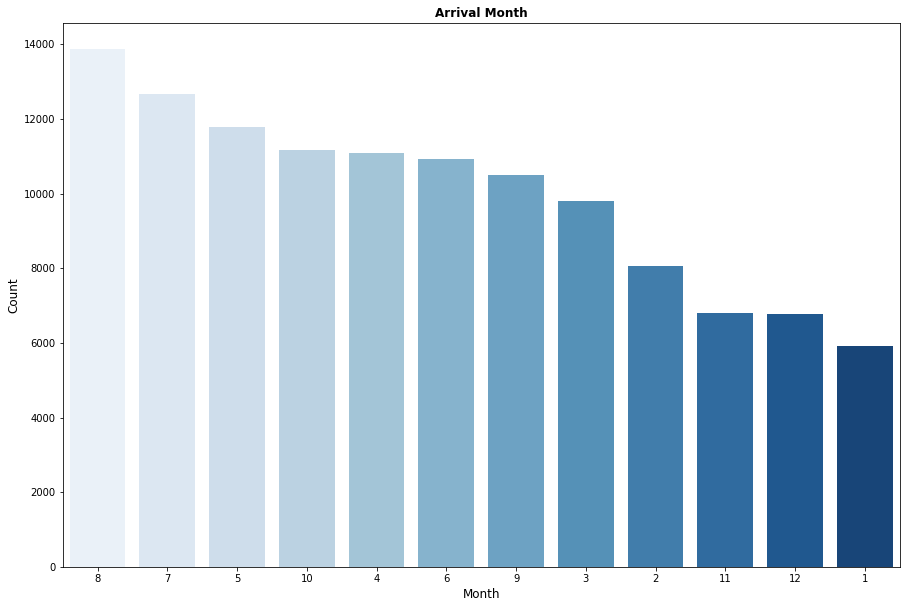

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotel_data,
              order=pd.value_counts(hotel_data['arrival_date_month']).index, palette='Blues')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [18]:
# Table of stay_in_weekend and stay_in_week_nights features

pd.crosstab(index = hotel_data['stays_in_week_nights'],columns=hotel_data['stays_in_weekend_nights'], 
            margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


#### Creating new feature: Weekday vs Weekend

In [19]:
pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
week_function(hotel_data['stays_in_weekend_nights'],hotel_data['stays_in_week_nights'], hotel_data)

#### Arrival_date_month vs Weekend or Weekday graph 

Text(0, 0.5, 'Count')

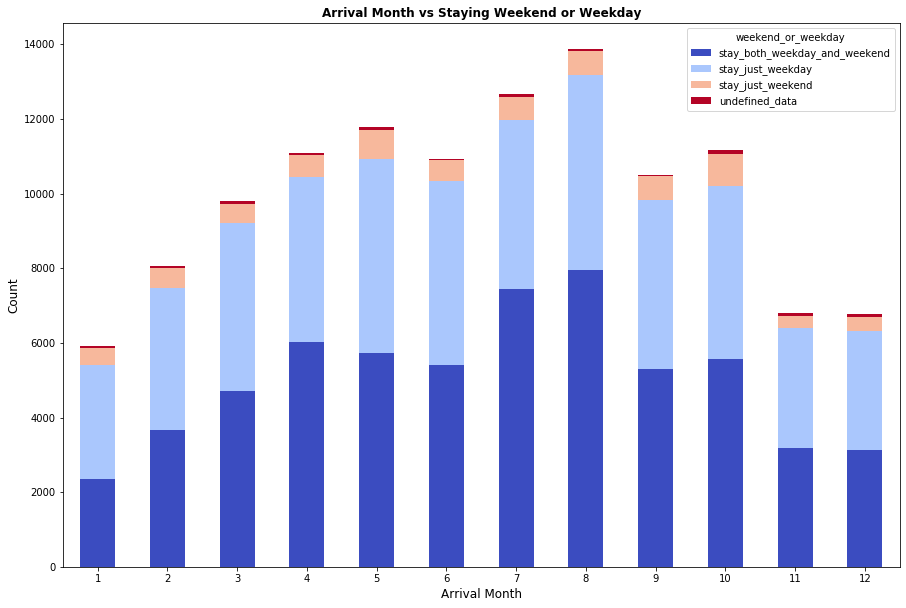

In [30]:
hotel_data['arrival_date_month']= hotel_data['arrival_date_month'].astype('int64')
group_data = hotel_data.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='coolwarm',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

#### Create new feature: all_children combining children and baby

In [31]:
hotel_data['all_children'] = hotel_data['children'] + hotel_data['babies']
pd.crosstab(hotel_data['adults'], hotel_data['all_children'], margins=True, margins_name = 'Total').iloc[:10]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


Meal feature donut chart

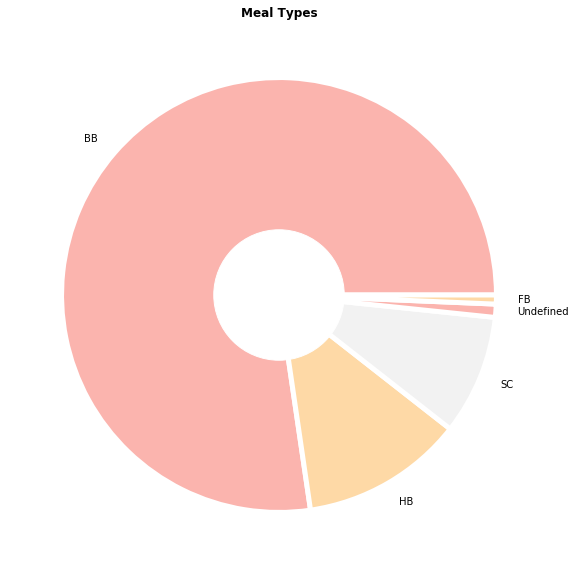

In [53]:
meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = hotel_data['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel1")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.3, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

Group by Meal and Hotel features

In [6]:
group_meal_data = hotel_data.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())*100
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,67.50,5.51,44.37,99.19,0.00
Resort Hotel,32.50,94.49,55.63,0.81,100.00


Create Top 10 Country of Origin graph

Text(0, 0.5, 'Count')

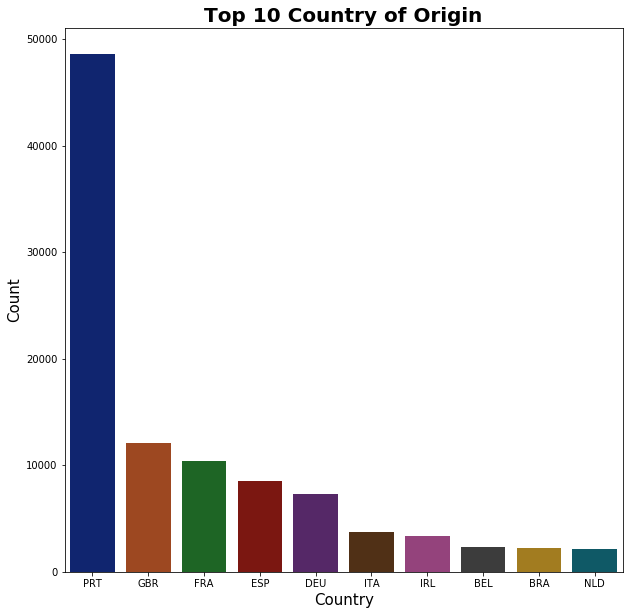

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotel_data, 
              order=pd.value_counts(hotel_data['country']).iloc[:10].index, palette="dark")
plt.title('Top 10 Country of Origin', weight='bold', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)

Market Segment Exploration

Text(0, 0.5, 'Count')

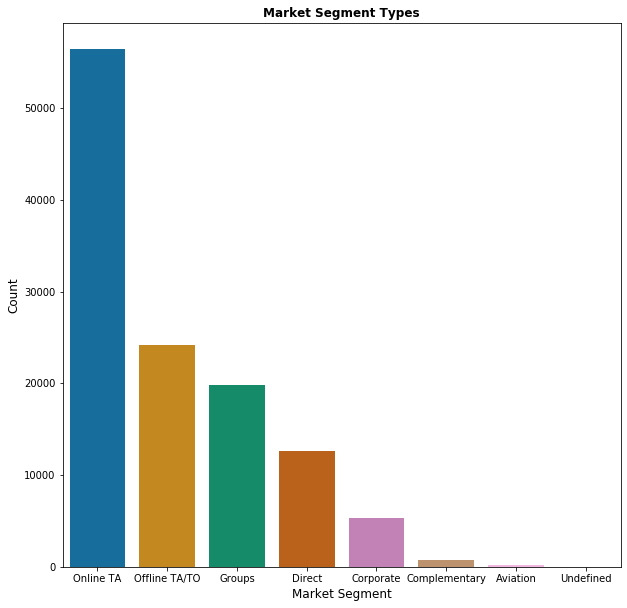

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(hotel_data['market_segment'], palette='colorblind', 
              order=pd.value_counts(hotel_data['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

Reserved vs Assigned room types table

In [11]:
pd.crosstab(index = hotel_data['reserved_room_type'], 
            columns = hotel_data['assigned_room_type'],normalize='index').round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,86.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,91.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0,0.0


Arrival Month vs ADR and Booking Cancellation Status

Text(0, 0.5, 'ADR')

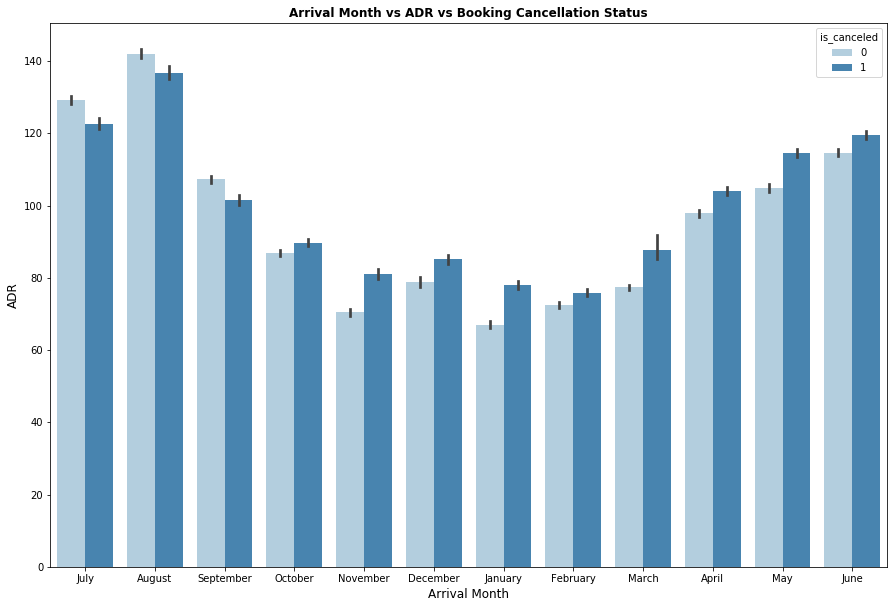

In [12]:
hotel_data['adr'] = hotel_data['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'Blues', data=hotel_data)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

Text(0, 0.5, 'Count')

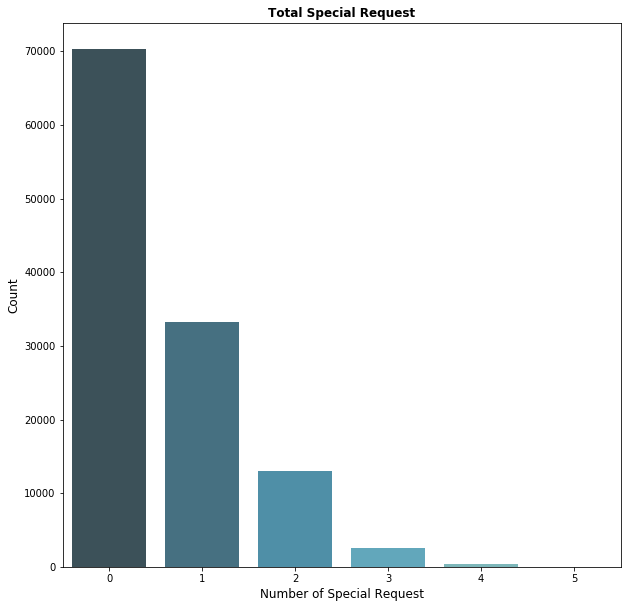

In [74]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=hotel_data, palette = 'GnBu_d')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

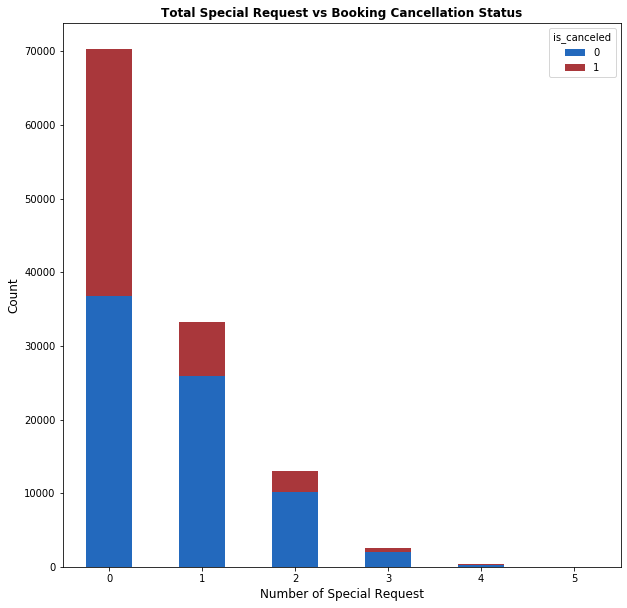

In [75]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = hotel_data.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

# Missing Data and Correlation Matrix

In [76]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Fill missing data

In [77]:
hotel_data['children'] =  hotel_data['children'].fillna(0)
hotel_data['all_children'] =  hotel_data['all_children'].fillna(0)
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode().index[0])
hotel_data['agent']= hotel_data['agent'].fillna('0')
hotel_data=hotel_data.drop(['company'], axis =1)

Change data structure

In [78]:
hotel_data['agent']= hotel_data['agent'].astype(int)
hotel_data['country']= hotel_data['country'].astype(str)

#### Using Label Encoder method for categorical features

In [79]:
labelencoder = LabelEncoder()
hotel_data['hotel'] = labelencoder.fit_transform(hotel_data['hotel'])
hotel_data['arrival_date_month'] = labelencoder.fit_transform(hotel_data['arrival_date_month'])
hotel_data['meal'] = labelencoder.fit_transform(hotel_data['meal'])
hotel_data['country'] = labelencoder.fit_transform(hotel_data['country'])
hotel_data['market_segment']= labelencoder.fit_transform(hotel_data['market_segment'])
hotel_data['distribution_channel']=labelencoder.fit_transform(hotel_data['distribution_channel'])
hotel_data['is_repeated_guest'] = labelencoder.fit_transform(hotel_data['is_repeated_guest'])
hotel_data['reserved_room_type'] = labelencoder.fit_transform(hotel_data['reserved_room_type'])
hotel_data['assigned_room_type'] = labelencoder.fit_transform(hotel_data['assigned_room_type'])
hotel_data['deposit_type'] = labelencoder.fit_transform(hotel_data['deposit_type'])
hotel_data['agent'] = labelencoder.fit_transform(hotel_data['agent'])
hotel_data['customer_type'] = labelencoder.fit_transform(hotel_data['customer_type'])
hotel_data['reservation_status'] = labelencoder.fit_transform(hotel_data['reservation_status'])
hotel_data['weekend_or_weekday'] = labelencoder.fit_transform(hotel_data['weekend_or_weekday'])

#### Create new dataframe for categorical data

In [80]:
hotel_data_categorical = hotel_data[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status', 
                                     'weekend_or_weekday']]
hotel_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119390 non-null  int32
 1   is_canceled           119390 non-null  int64
 2   arrival_date_month    119390 non-null  int64
 3   meal                  119390 non-null  int32
 4   country               119390 non-null  int32
 5   market_segment        119390 non-null  int32
 6   distribution_channel  119390 non-null  int32
 7   is_repeated_guest     119390 non-null  int64
 8   reserved_room_type    119390 non-null  int32
 9   assigned_room_type    119390 non-null  int32
 10  deposit_type          119390 non-null  int32
 11  agent                 119390 non-null  int64
 12  customer_type         119390 non-null  int32
 13  reservation_status    119390 non-null  int32
 14  weekend_or_weekday    119390 non-null  int32
dtypes: int32(11), int64(4)
memory usag

#### Create new dataframe for numerical data

In [81]:
hotel_data_numerical= hotel_data.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)
hotel_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  days_in_waiting_

Correlation Matrix with Spearman method

Text(0.5, 1, 'Correlation Matrix Spearman Method- Categorical Data ')

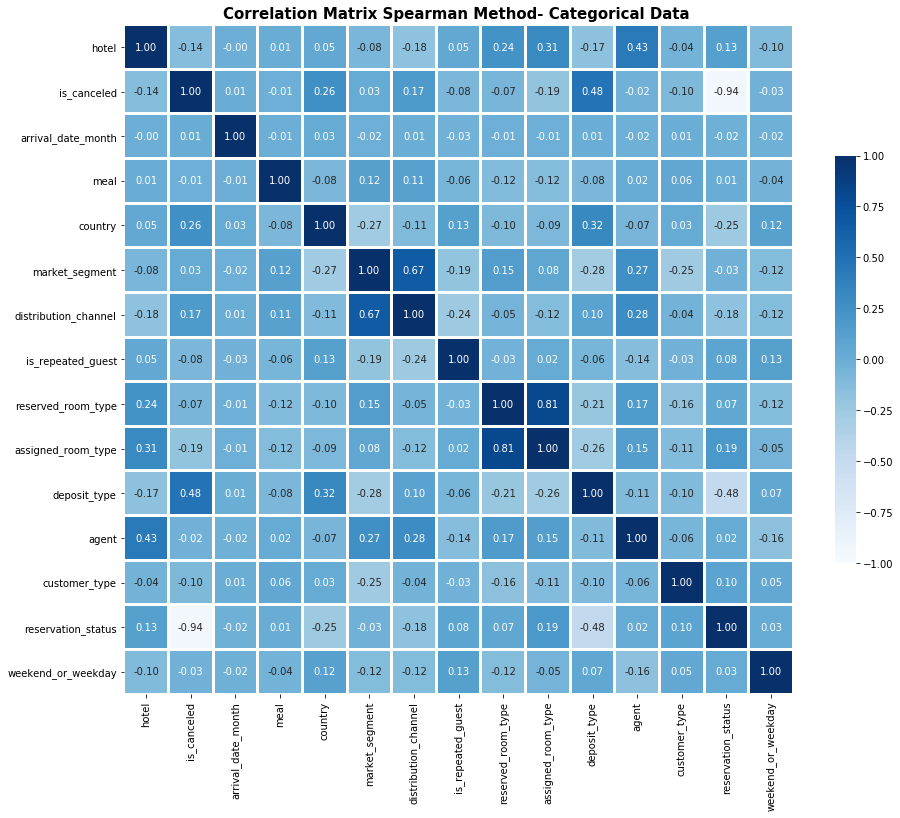

In [83]:
plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Correlation Matrix with Pearson method

Text(0.5, 1, 'Correlation Matrix Pearson Method- Numerical Data ')

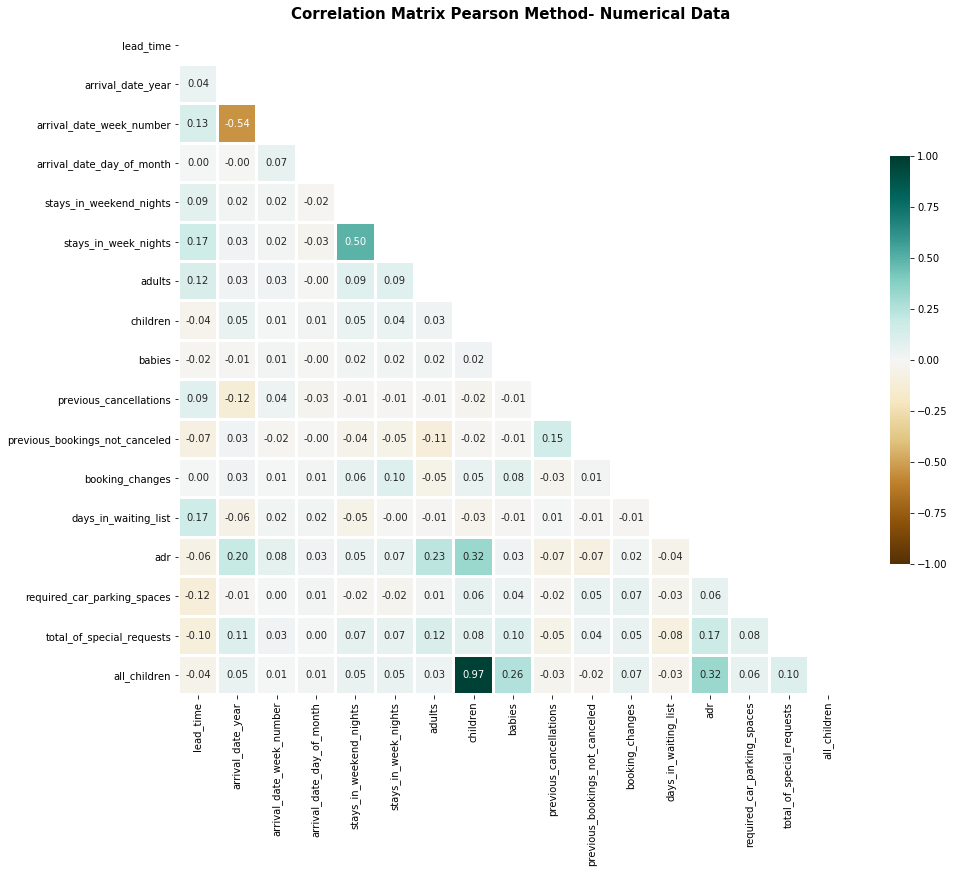

In [86]:
plt.figure(figsize=(15,15))
corr_numerical=hotel_data_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='BrBG', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

#### Finding high correlated features

In [87]:
corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

[] ['children']


In [88]:
# `reservation_status` vs `is_canceled` table

pd.crosstab(columns = hotel_data['reservation_status'], index = hotel_data['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,0,1,2,Total
is_canceled,,,,
0,0,75166,0,75166
1,43017,0,1207,44224
Total,43017,75166,1207,119390


In [89]:
#Dropping some features from data

hotel_data = hotel_data.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [90]:
#Copying data to used next parts

hotel_data_model = hotel_data

# Feature Importance

In [18]:
# Separate target variable

hotel_data_tunning = hotel_data
y = hotel_data_tunning.iloc[:,1]
X = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)

Permutation Importance graph

In [92]:
params = {
    'criterion': 'giny', 
    'learning_rate': 0.01, 
    'max_depth': 5,
    'n_estimators': 100, 
    'objective': 'binary:logistic', 
}
model = XGBClassifier(parameters=params)
# fit the model
model.fit(X, y)
# perform permutation importance
result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

[19:11:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { parameters } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Feature scores table

In [93]:
for i,v in enumerate(sorted_idx):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 9.00000
Feature: 1, Score: 27.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 28.00000
Feature: 4, Score: 14.00000
Feature: 5, Score: 13.00000
Feature: 6, Score: 22.00000
Feature: 7, Score: 8.00000
Feature: 8, Score: 6.00000
Feature: 9, Score: 10.00000
Feature: 10, Score: 3.00000
Feature: 11, Score: 7.00000
Feature: 12, Score: 16.00000
Feature: 13, Score: 5.00000
Feature: 14, Score: 19.00000
Feature: 15, Score: 4.00000
Feature: 16, Score: 24.00000
Feature: 17, Score: 25.00000
Feature: 18, Score: 23.00000
Feature: 19, Score: 2.00000
Feature: 20, Score: 15.00000
Feature: 21, Score: 12.00000
Feature: 22, Score: 18.00000
Feature: 23, Score: 17.00000
Feature: 24, Score: 26.00000
Feature: 25, Score: 21.00000
Feature: 26, Score: 20.00000
Feature: 27, Score: 1.00000
Feature: 28, Score: 11.00000


In [95]:
# Elminate baby feature from data

hotel_data_model = hotel_data_model.drop(['babies'], axis=1)

# Model Building

Separate target variable for model building 

In [96]:
y_model = hotel_data_model.iloc[:,1]
X_model = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)
y_model.describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

Split to train and test with 70-30 ratio

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify = y)

Implement standart scaler method

In [98]:
standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

Stratified K-Fold Cross Validation Method

In [99]:
kfold_cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X_model,y_model):
    X_train, X_test = X_model.iloc[train_index], X_model.iloc[test_index]
    y_train, y_test = y_model.iloc[train_index], y_model.iloc[test_index]

### Decision Tree Model Building

In [100]:
dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4, max_features = 'auto')
# fit the model
dtc_model.fit(X_train, y_train)

#Predict Model
predict_dtc = dtc_model.predict(X_test)

### Random Forest Model Building

In [101]:
rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fit the model
estimator= rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

### Extra Trees Classifier Model Building

In [102]:
etc_model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                  n_estimators = 100)
# fit the model
etc_model.fit(X_train, y_train)

#Predict Model
predict_etc = etc_model.predict(X_test)

### Extreme Gradient Boosting Model Building

In [103]:
xgb_model = XGBClassifier(criterion = 'giny', learning_rate = 0.01, max_depth = 5, n_estimators = 100,
                          objective ='binary:logistic', subsample = 1.0)
# fit the model
xgb_model.fit(X_train, y_train)
#Predict Model
predict_xgb = xgb_model.predict(X_test)

[19:13:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




# Classification Reports and Classification Matrix

In [104]:
# Classification Reports 

print("RF", classification_report(y_test, predict_rf))
print("DTC",classification_report(y_test, predict_dtc))
print("ETC", classification_report(y_test, predict_etc))
print("XGB", classification_report(y_test, predict_xgb))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.91     15033
           1       0.88      0.79      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

DTC               precision    recall  f1-score   support

           0       0.87      0.91      0.89     15033
           1       0.83      0.77      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.84     23878
weighted avg       0.85      0.86      0.85     23878

ETC               precision    recall  f1-score   support

           0       0.85      0.95      0.90     15033
           1       0.90      0.72      0.80      8845

    accuracy                           0.87     23878
   macro avg       0.88      0.84      0.85     23878
weighted avg       0.87      0.87      0.86     23878

XGB     

Text(570.5454545454544, 0.5, 'Actual Labels')

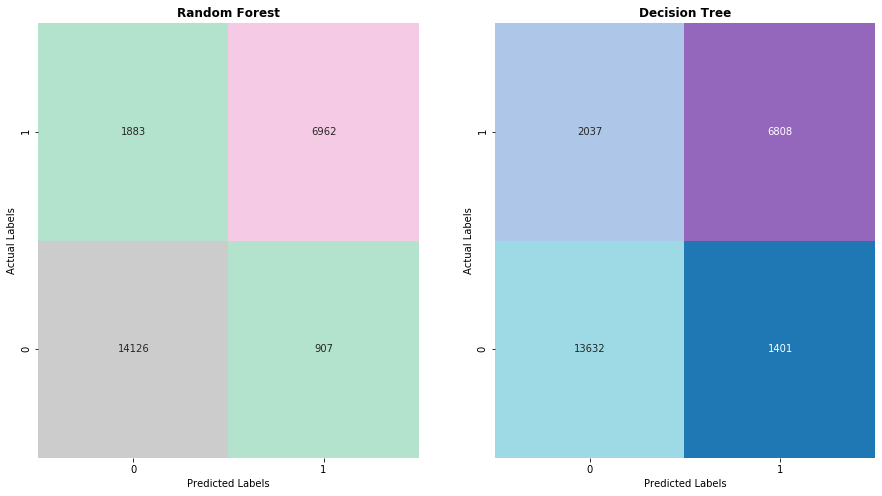

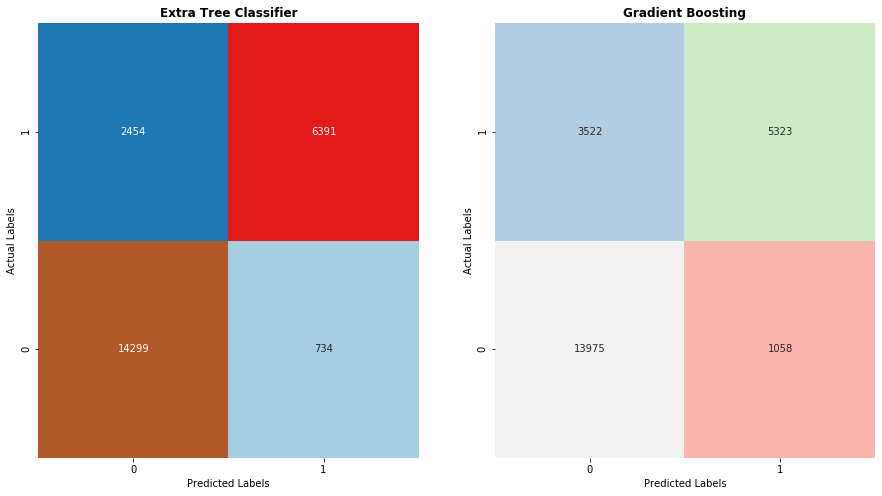

In [105]:
# Confusion Matrix 

DTC_matrix = confusion_matrix(y_test, predict_dtc)
RF_matrix = confusion_matrix(y_test, predict_rf)
ETC_matrix = confusion_matrix(y_test, predict_etc)
XGB_matrix = confusion_matrix(y_test, predict_xgb) 

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(RF_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(DTC_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("Decision Tree", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(ETC_matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("Extra Tree Classifier", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(XGB_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("Gradient Boosting", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')